# Importing Libraries

In [3]:
import pandas as pd
from pandas import to_datetime
import numpy as np
import seaborn as sns
import cufflinks as cf
import plotly.express as px
import plotly.express.colors as colors
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.offline as pyo
import glob
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')

# Reading The File

In [4]:
df =pd.read_csv('supermarket_sales - Sheet1.csv')

# Seeing Maximum Columns

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Seeing The Number of Rows and Columns

In [7]:
df.shape

(1000, 17)

# Getting The Info Of Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# DATA CLEANING

# Cleaning the Date Column

In [9]:
df['Date'] = to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [10]:
df = df.rename(columns={'Date': 'Date of Info'})

# Cleaning the Time column

In [11]:
df['Time'] = to_datetime(df['Time'])

In [12]:
df['Hours'] = df['Time'].dt.hour

In [13]:
df['Time'] = df['Time'].astype(str)

In [14]:
df[['Current Date', 'Current Time']] = df['Time'].str.split(' ', 1, expand=True)

In [15]:
df.drop(columns = 'Time', inplace = True)

# Checking For Null Value

In [16]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date of Info               0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Day                        0
Month                      0
Year                       0
Hours                      0
Current Date               0
Current Time               0
dtype: int64

# The Cleaned DataFrame

In [17]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date of Info,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hours,Current Date,Current Time
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,13,2023-05-17,13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,10,2023-05-17,10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,13,2023-05-17,13:23:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,20,2023-05-17,20:33:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,10,2023-05-17,10:37:00


# Exploratory Data Analysis EDA
* City With The Highest Sales
* Total Rating Per City
* The Most Used Product line Per Gender
* The Most Used Payment method Per Product Line
* Distribution of Customer Types by Gender
* Total Time spent by Gender
* Total Time spent by Customer type
* Product Line Performance

# City With The Highest Sales

In [18]:
# Group the data by city and count the number of occurrences
sales_by_city = df.groupby('City')['Total'].sum().reset_index().sort_values('Total', ascending=False)

# Create a list of colors, where the longest bar is colored blue and the others are colored grey
colors = ['red' if city == sales_by_city['City'].iloc[0] else 'grey' for city in sales_by_city['City']]

# Create the bar chart using Plotly Express
fig = go.Figure(data=[go.Bar(x=sales_by_city['City'], y=sales_by_city['Total'], marker_color=colors)])

# Set the chart title and size
fig.update_layout(title='City With The Highest Sales', width=500, height=500)

# Add axis labels
fig.update_xaxes(title_text='City')
fig.update_yaxes(title_text='Total Sales')

# Add annotations
annotations = [dict(x=c, y=v, text='${:,.0f}'.format(v), font=dict(size=12), showarrow=False) 
               for c, v in zip(sales_by_city['City'], sales_by_city['Total'])]

fig.update_layout(annotations=annotations)

# Show the chart
fig.show()


# OBSERVATION:
* from the bar we observe that Naypyitaw has the highest sale $110,569 and Mandalay is slightly above Yangon

# Total Rating Per City

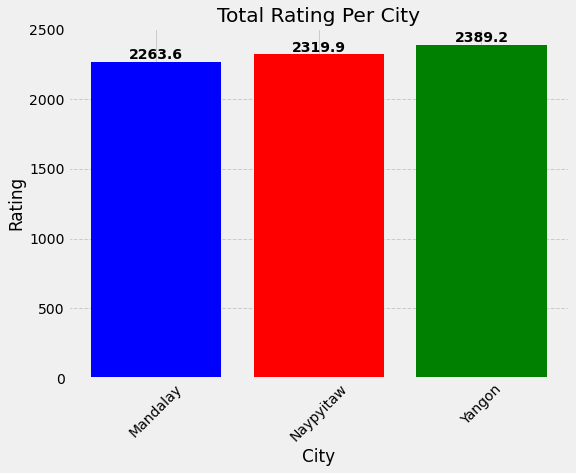

In [19]:
city_rating = df.groupby('City')['Rating'].sum()

plt.figure(figsize=(8, 6)) # create figure before plotting
plt.bar(city_rating.index, city_rating.values, color=['blue', 'red', 'green'])

plt.title('Total Rating Per City')
plt.xlabel('City')
plt.ylabel('Rating')

plt.xticks(rotation=45)
for i, v in enumerate(city_rating.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')
    
plt.grid(True, axis='y', linestyle='--')

plt.savefig('chart.png', dpi=300, bbox_inches='tight')
plt.show()


# OBSERVATION
* From the bar we see that Yangon has the highest rating and its slightly higher than Naypyitaw...
* But Naypyitaw has the highest sales from our previous observation...
* This could be because some customers in Naypyitaw forgot or refused to give their rating...
so Naypyitaw hould always encourage their customers to rate there services

# The Most Used Product line Per Gender

In [20]:
# Count the occurrences of each gender-product line combination
counts = df.groupby(['Product line', 'Gender']).size().reset_index(name='Count')

# Calculate the total count for each gender
total_counts = counts.groupby('Gender').agg({'Count': 'sum'}).reset_index()

# Calculate the percentage of each count relative to the gender total
counts = counts.merge(total_counts, on='Gender', suffixes=('', '_total'))
counts['Percent'] = counts['Count'] / counts['Count_total'] * 100

# Create the bar chart using Plotly Express
fig = px.bar(counts, x='Count', y='Product line', orientation='h', color='Gender',
             title='The Most Used Product line Per Gender', width=800, height=500,
             text=counts['Percent'].round(1).astype(str) + '%')

fig.update_traces(textposition='inside')
fig.update_layout(legend_title_text='Gender', legend_traceorder='reversed')
fig.update_xaxes(title_text='Count')
fig.update_yaxes(title_text='Product line')

# Show the chart
fig.show()


# OBSERVATION
* from the chart it has been observated that females spend more on Fashion accessories and i dont really find this to be odd
* We also observed that the men spend more on Health and Beauty... probably because they are the bread winners of the family and
they have a responsibility to keep their family healthy and wife beautiful

# The Most Used Payment method Per Product Line

In [21]:
# Count the occurrences of each product line-payment combination
counts = df.groupby(['Product line', 'Payment']).size().reset_index(name='Count')

# Calculate the total count for each product line
total_counts = counts.groupby('Product line').agg({'Count': 'sum'}).reset_index()

# Calculate the percentage of each count relative to the product line total
counts = counts.merge(total_counts, on='Product line', suffixes=('', '_total'))
counts['Percent'] = counts['Count'] / counts['Count_total'] * 100

# Create the bar chart using Plotly Express
fig = px.bar(counts, x='Count', y='Product line', orientation='h', color='Payment',
             title='The Most Used Payment method Per Product Line', width=800, height=500,
             text=counts['Percent'].round(1).astype(str) + '%')

fig.update_traces(textposition='inside', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.update_xaxes(title_text='Count')
fig.update_yaxes(title_text='Product line')

# Show the chart
fig.show()


# OBSERVATION
* we see that in the purchase of ELECTRONIC ACCESSORIS *CASH* was used more(71 counts)
* we see that in the purchase of FOOD and BEVERAGES *CREDIT CARD* was used more(61 counts)
* we see that in the purchase of FASHION ACCESSORIES *EWALLET* was used more(65 counts)

# Distribution of Customer Types by Gender

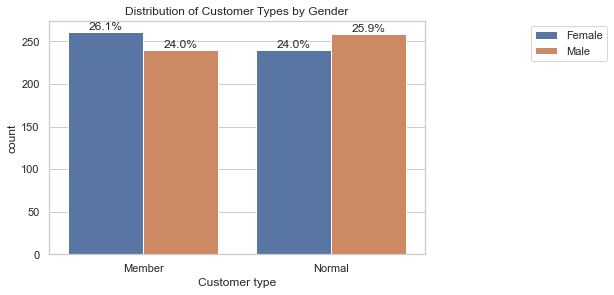

In [22]:
sns.set(style="whitegrid")
ax = sns.countplot(x=df['Customer type'], hue=df['Gender'])

# Calculate percentage for each category
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.1f}%'.format(100 * height / total),
            ha="center")

# Add title
ax.set_title("Distribution of Customer Types by Gender")

# Adjust legend location and display the plot
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()


# OBSERVATION
* we see that we have more Females than Males as members and Customers
* we see that we have more Males than Females as normal Customers

# Total Time spent by Gender

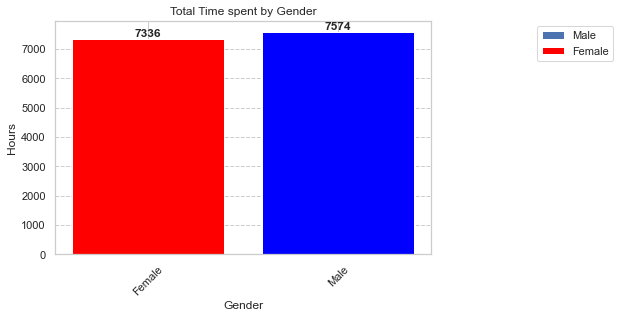

<Figure size 576x432 with 0 Axes>

In [23]:
time_spent = df.groupby('Gender')['Hours'].sum()

plt.bar(time_spent.index, time_spent.values)
plt.title('Total Time spent by Gender')
plt.xlabel('Gender')
plt.ylabel('Hours')

plt.xticks(rotation=45)
for i, v in enumerate(time_spent.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')
plt.bar(time_spent.index, time_spent.values, color=['red', 'blue'])
plt.legend(['Male', 'Female'], bbox_to_anchor=(1.5, 1))
plt.grid(True, axis='y', linestyle='--')
plt.figure(figsize=(8, 6))
plt.savefig('chart.png', dpi=300, bbox_inches='tight')

plt.show()


# OBSERVATION
* it is observed that the MALE spends more time in the supermarket...i found this really strange at first but evaluating properly 
we see that the male almost almost always follows the females for shopping and spends time there with her and is in some cases he
does the shopping for her and still have to shop for himelf later....i believe this could be the reason why the MALE spends more
time in the supermarket

# Total Time spent by Customer type

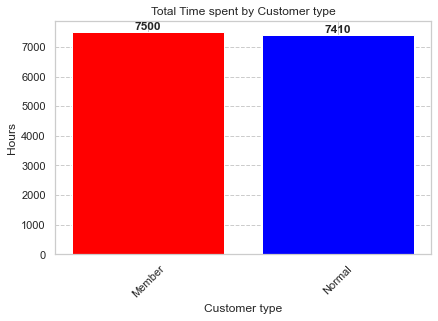

<Figure size 576x432 with 0 Axes>

In [24]:
customer_time_spent = df.groupby('Customer type')['Hours'].sum()


plt.title('Total Time spent by Customer type')
plt.xlabel('Customer type')
plt.ylabel('Hours')

plt.xticks(rotation=45)
for i, v in enumerate(customer_time_spent.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')
plt.bar(customer_time_spent.index, customer_time_spent.values, color=['red', 'blue'])
plt.grid(True, axis='y', linestyle='--')
plt.figure(figsize=(8, 6))
plt.savefig('chart.png', dpi=300, bbox_inches='tight')

plt.show()


# OBSERVATION
* I find it very normal for members  to spent more time in the supermarket than normal customers doh it' just a slight difference.

# Product Line Performance

In [25]:
def plot_scatter(df, x_col, y_col, title, x_label, y_label):
    # Summarize the data
    summarized_data = df.groupby('Product line')['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating'].sum().round()

    # Create a scatter plot
    hover_text = [
        "Product line: {}<br>Rating: {}<br>Total Sales: {}<br>Unit price: {}<br>Quantity: {}<br>Tax 5%: {}<br>cogs: {}<br>gross margin percentage: {}<br>gross income: {}".format(product, rating, sales, unit_price, quantity, tax, cogs, margin, income) for product, rating, sales, unit_price, quantity, tax, cogs, margin, income in zip(summarized_data.index, summarized_data['Rating'], summarized_data['Total'], summarized_data['Unit price'], summarized_data['Quantity'], summarized_data['Tax 5%'], summarized_data['cogs'], summarized_data['gross margin percentage'], summarized_data['gross income'])]

    scatter = go.Scatter(x=summarized_data[x_col], y=summarized_data[y_col], mode='markers', text=hover_text)

    # Customize the layout of the plot
    layout = go.Layout(title=title, xaxis=dict(title=x_label), yaxis=dict(title=y_label))

    # Display the plot
    fig = go.Figure(data=[scatter], layout=layout)
    pyo.iplot(fig)

# Call the function with the appropriate parameters
plot_scatter(df, 'Rating', 'Total', 'Product Line Performance', 'Rating', 'Total Sales')


# OBSERVATION
* i find it very normal for FOOD AND BEVERAGES to be top in our chart because it one of the primary needs of man